In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('tb_lobby_stats_player.csv')
data.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184152 entries, 0 to 184151
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idLobbyGame     184152 non-null  int64  
 1   idPlayer        184152 non-null  int64  
 2   idRoom          184152 non-null  int64  
 3   qtKill          184152 non-null  int64  
 4   qtAssist        184152 non-null  int64  
 5   qtDeath         184152 non-null  int64  
 6   qtHs            184152 non-null  int64  
 7   qtBombeDefuse   184152 non-null  int64  
 8   qtBombePlant    184152 non-null  int64  
 9   qtTk            184032 non-null  float64
 10  qtTkAssist      184032 non-null  float64
 11  qt1Kill         184152 non-null  int64  
 12  qt2Kill         184152 non-null  int64  
 13  qt3Kill         184152 non-null  int64  
 14  qt4Kill         184152 non-null  int64  
 15  qt5Kill         184152 non-null  int64  
 16  qtPlusKill      184152 non-null  int64  
 17  qtFirstKil

In [42]:
D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:5_000]

In [43]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   qtKill          5000 non-null   int64
 1   qtAssist        5000 non-null   int64
 2   qtDeath         5000 non-null   int64
 3   qtHs            5000 non-null   int64
 4   qtBombeDefuse   5000 non-null   int64
 5   qtBombePlant    5000 non-null   int64
 6   qtFirstKill     5000 non-null   int64
 7   vlDamage        5000 non-null   int64
 8   qtShots         5000 non-null   int64
 9   qtClutchWon     5000 non-null   int64
 10  qtRoundsPlayed  5000 non-null   int64
 11  flWinner        5000 non-null   int64
dtypes: int64(12)
memory usage: 468.9 KB


In [5]:
T = TSNE(n_components=2, perplexity=25, random_state=123)

In [6]:
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
print(D)
TSNE_features = T.fit_transform(D)
TSNE_features[1:4, :]

        qtKill  qtAssist   qtDeath      qtHs  qtBombeDefuse  qtBombePlant  \
0     0.096154    0.0625  0.372093  0.064516           0.00      0.000000   
1     0.461538    0.1875  0.418605  0.193548           0.00      0.444444   
2     0.115385    0.2500  0.534884  0.064516           0.00      0.111111   
3     0.192308    0.3125  0.465116  0.129032           0.25      0.000000   
4     0.153846    0.2500  0.604651  0.193548           0.00      0.222222   
...        ...       ...       ...       ...            ...           ...   
4995  0.346154    0.2500  0.418605  0.225806           0.25      0.111111   
4996  0.442308    0.3750  0.488372  0.451613           0.25      0.000000   
4997  0.192308    0.0625  0.441860  0.096774           0.00      0.000000   
4998  0.211538    0.0625  0.511628  0.129032           0.00      0.111111   
4999  0.461538    0.2500  0.604651  0.387097           0.00      0.333333   

      qtFirstKill  vlDamage   qtShots  qtClutchWon  qtRoundsPlayed  flWinne

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  8.36032 , -14.640973],
       [-49.680645, -12.62246 ],
       [ 48.4557  ,  31.48978 ]], dtype=float32)

<AxesSubplot: xlabel='x', ylabel='y'>

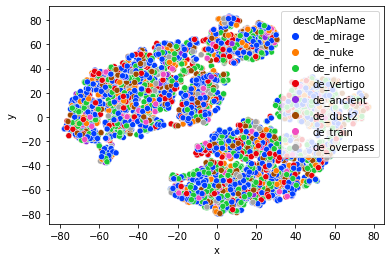

In [7]:
DATA = D.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
sns.scatterplot(x='x', y='y', hue=data['descMapName'],
                data=DATA, palette='bright')

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: xlabel='x', ylabel='y'>

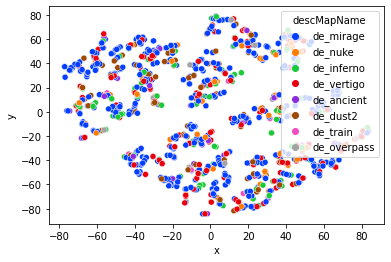

In [8]:
D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:1_000]
T = TSNE(n_components=2, perplexity=5, random_state=123)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
TSNE_features = T.fit_transform(D)
DATA = D.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
sns.scatterplot(x='x', y='y', hue=data['descMapName'],
                data=DATA, palette='bright')

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: xlabel='x', ylabel='y'>

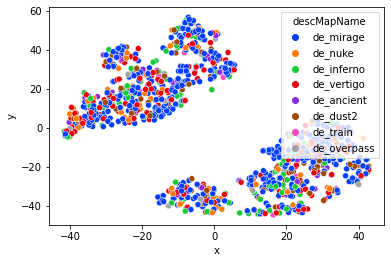

In [9]:
D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:1_000]
T = TSNE(n_components=2, perplexity=25, random_state=123)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
TSNE_features = T.fit_transform(D)
DATA = D.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
sns.scatterplot(x='x', y='y', hue=data['descMapName'],
                data=DATA, palette='bright')

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: xlabel='x', ylabel='y'>

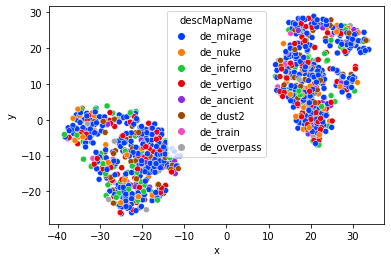

In [10]:
D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:1_000]
T = TSNE(n_components=2, perplexity=50, random_state=123)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
TSNE_features = T.fit_transform(D)
DATA = D.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
sns.scatterplot(x='x', y='y', hue=data['descMapName'],
                data=DATA, palette='bright')

In [24]:
import umap.umap_ as umap

[Text(0.5, 1.0, '(50, 0.6)')]

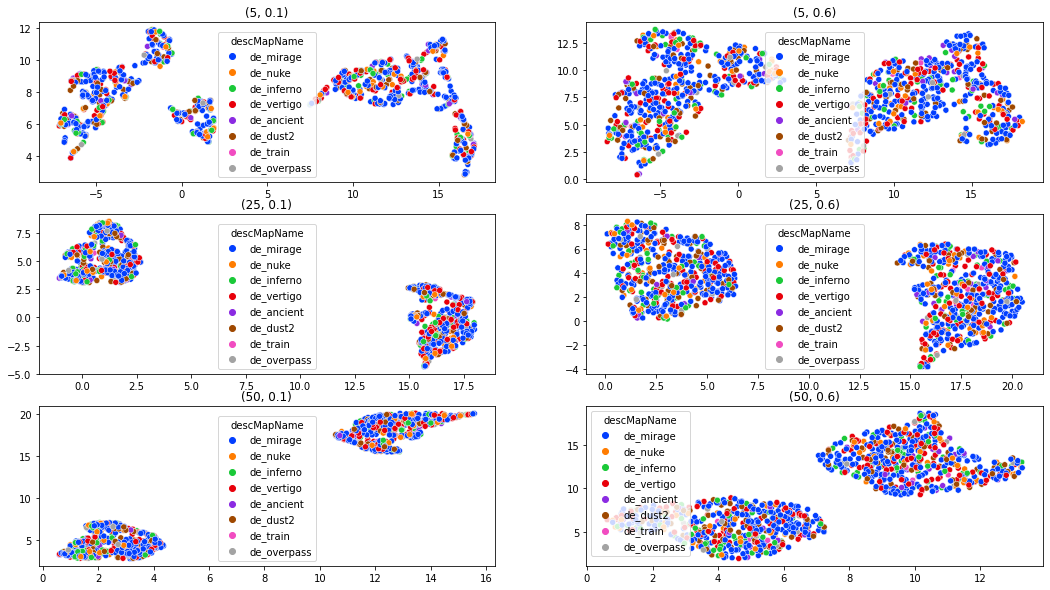

In [87]:
D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:1_000]
scaler = preprocessing.MinMaxScaler()
DATA = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
n_n = (5, 25, 50)
m_d = (0.1, 0.6)
um = dict()

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i],
                                         min_dist=m_d[j], random_state=123).fit_transform(DATA))
        x = um[(n_n[i], m_d[j])][:, 0]
        y = um[(n_n[i], m_d[j])][:, 1]
        
x_1, y_1 = um[(5, 0.1)][:, 0], um[(5, 0.1)][:, 1]
x_2, y_2 = um[(5, 0.6)][:, 0], um[(5, 0.6)][:, 1]
x_3, y_3 = um[(25, 0.1)][:, 0], um[(25, 0.1)][:, 1]
x_4, y_4 = um[(25, 0.6)][:, 0], um[(25, 0.6)][:, 1]
x_5, y_5 = um[(50, 0.1)][:, 0], um[(50, 0.1)][:, 1]
x_6, y_6 = um[(50, 0.6)][:, 0], um[(50, 0.6)][:, 1]

sns.scatterplot(ax=axes[0, 0], x=x_1, y=y_1, hue=data['descMapName'][:1_000], 
                palette='bright').set(title=f'{list(um.keys())[0]}')
sns.scatterplot(ax=axes[0, 1], x=x_2, y=y_2, hue=data['descMapName'][:1_000], 
                palette='bright').set(title=f'{list(um.keys())[1]}')
sns.scatterplot(ax=axes[1, 0], x=x_3, y=y_3, hue=data['descMapName'][:1_000], 
                palette='bright').set(title=f'{list(um.keys())[2]}')
sns.scatterplot(ax=axes[1, 1], x=x_4, y=y_4, hue=data['descMapName'][:1_000], 
                palette='bright').set(title=f'{list(um.keys())[3]}')
sns.scatterplot(ax=axes[2, 0], x=x_5, y=y_5, hue=data['descMapName'][:1_000], 
                palette='bright').set(title=f'{list(um.keys())[4]}')
sns.scatterplot(ax=axes[2, 1], x=x_6, y=y_6, hue=data['descMapName'][:1_000], 
                palette='bright').set(title=f'{list(um.keys())[5]}')

In [15]:
map_list = sorted(data.descMapName.unique())
for i in map_list:
    print(f'{i}: {len(data[data.descMapName == i])}')

de_ancient: 4233
de_dust2: 23834
de_inferno: 42073
de_mirage: 58101
de_nuke: 14053
de_overpass: 14088
de_train: 7846
de_vertigo: 19924


In [29]:
data_1 = data[data.descMapName == 'de_ancient'][:1_000]
data_2 = data[data.descMapName == 'de_dust2'][:1_000]
data_3 = data[data.descMapName == 'de_inferno'][:1_000]
data_4 = data[data.descMapName == 'de_mirage'][:1_000]
data_5 = data[data.descMapName == 'de_nuke'][:1_000]
data_6 = data[data.descMapName == 'de_overpass'][:1_000]
data_7 = data[data.descMapName == 'de_train'][:1_000]
data_8 = data[data.descMapName == 'de_vertigo'][:1_000]

frames = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8]

new_data = pd.concat(frames)

In [30]:
new_D = new_data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)

In [31]:
new_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 15 to 8690
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   qtKill          8000 non-null   int64
 1   qtAssist        8000 non-null   int64
 2   qtDeath         8000 non-null   int64
 3   qtHs            8000 non-null   int64
 4   qtBombeDefuse   8000 non-null   int64
 5   qtBombePlant    8000 non-null   int64
 6   qtFirstKill     8000 non-null   int64
 7   vlDamage        8000 non-null   int64
 8   qtShots         8000 non-null   int64
 9   qtClutchWon     8000 non-null   int64
 10  qtRoundsPlayed  8000 non-null   int64
 11  flWinner        8000 non-null   int64
dtypes: int64(12)
memory usage: 812.5 KB


In [32]:
T = TSNE(n_components=2, perplexity=25, random_state=123)
scaler = preprocessing.MinMaxScaler()
new_D = pd.DataFrame(scaler.fit_transform(new_D), columns=new_D.columns)
print(new_D)
TSNE_features = T.fit_transform(new_D)
TSNE_features[1:4, :]

        qtKill  qtAssist   qtDeath      qtHs  qtBombeDefuse  qtBombePlant  \
0     0.034483  0.000000  0.416667  0.032258            0.0      0.250000   
1     0.172414  0.235294  0.500000  0.193548            0.0      0.083333   
2     0.500000  0.117647  0.416667  0.354839            0.0      0.166667   
3     0.327586  0.117647  0.229167  0.129032            0.4      0.083333   
4     0.206897  0.000000  0.375000  0.193548            0.0      0.166667   
...        ...       ...       ...       ...            ...           ...   
7995  0.206897  0.058824  0.291667  0.129032            0.0      0.250000   
7996  0.396552  0.117647  0.416667  0.387097            0.0      0.083333   
7997  0.413793  0.294118  0.375000  0.322581            0.0      0.083333   
7998  0.189655  0.235294  0.416667  0.161290            0.0      0.083333   
7999  0.241379  0.176471  0.437500  0.322581            0.0      0.333333   

      qtFirstKill  vlDamage   qtShots  qtClutchWon  qtRoundsPlayed  flWinne

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ -9.938632,  51.314686],
       [-21.256931, -19.296446],
       [ 73.09637 , -31.23705 ]], dtype=float32)

<AxesSubplot: xlabel='x', ylabel='y'>

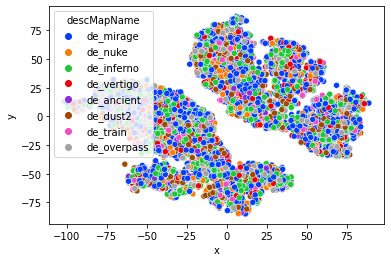

In [33]:
new_DATA = new_D.copy()
new_DATA['x'] = TSNE_features[:, 0]
new_DATA['y'] = TSNE_features[:, 1]
sns.scatterplot(x='x', y='y', hue=data['descMapName'],
                data=new_DATA, palette='bright')

<AxesSubplot: >

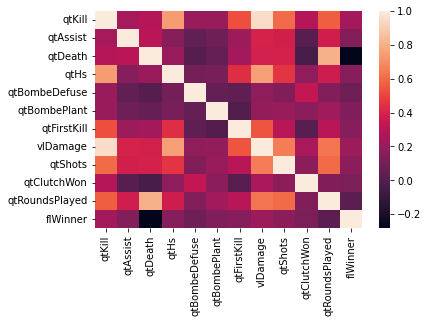

In [47]:
sns.heatmap(new_D.corr())

In [70]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60_000, 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [73]:
y_test = pd.DataFrame(y_test)
x_test = pd.DataFrame(x_test)

In [75]:
mnist_D = x_test

In [80]:
model = TSNE(n_components=2, perplexity=25, random_state=123)
scaler = preprocessing.MinMaxScaler()
mnist_D = pd.DataFrame(scaler.fit_transform(mnist_D), columns=mnist_D.columns)
print(mnist_D.shape)
TSNE_features = T.fit_transform(mnist_D)
TSNE_features[1:4, :]

(10000, 784)


C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-52.395897 ,  25.579494 ],
       [-66.60108  ,  -2.9771035],
       [ 51.054314 ,  38.22149  ]], dtype=float32)

<AxesSubplot: xlabel='x', ylabel='y'>

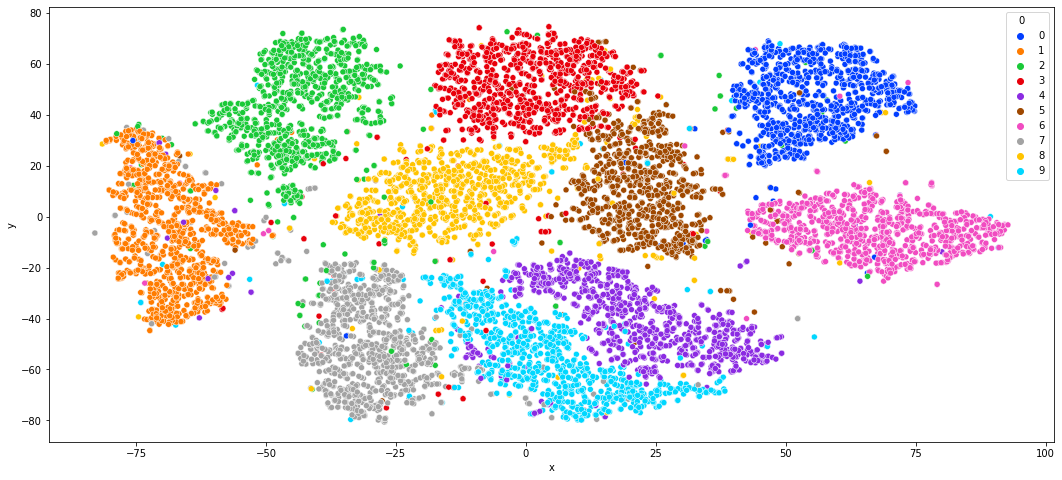

In [86]:
mnist_DATA = mnist_D.copy()
mnist_DATA['x'] = TSNE_features[:, 0]
mnist_DATA['y'] = TSNE_features[:, 1]
plt.figure(figsize=(18, 8))
sns.scatterplot(x='x', y='y', hue=y_test[0],
                data=mnist_DATA, palette='bright')

[Text(0.5, 1.0, '(50, 0.6)')]

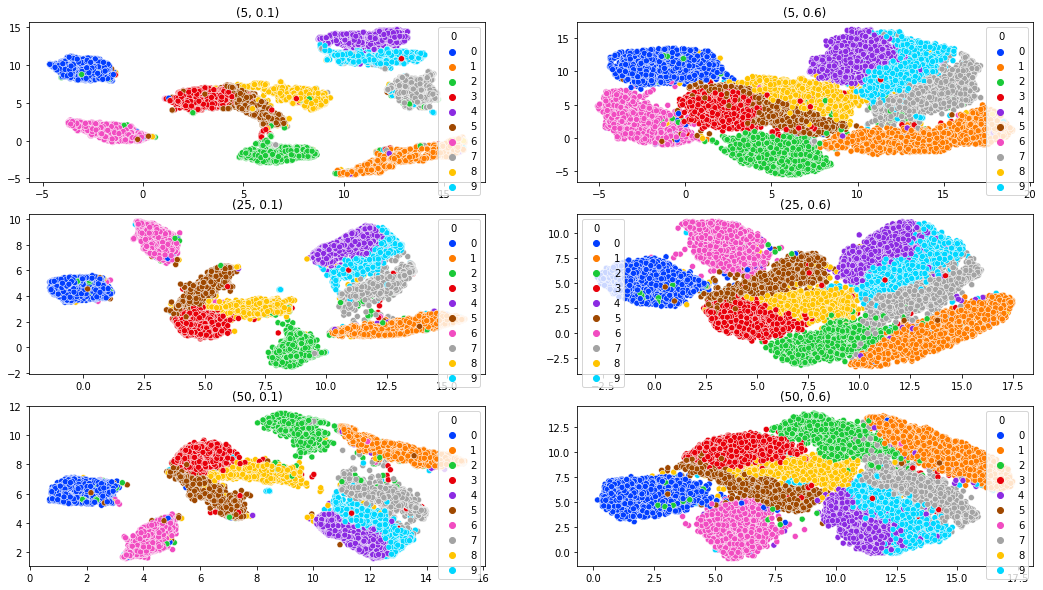

In [94]:
mnist_new_D = x_test
scaler = preprocessing.MinMaxScaler()
mnist_DATA = pd.DataFrame(scaler.fit_transform(mnist_new_D), columns=mnist_new_D.columns)
n_n = (5, 25, 50)
m_d = (0.1, 0.6)
um = dict()

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i],
                                         min_dist=m_d[j], random_state=123).fit_transform(mnist_DATA))
        x = um[(n_n[i], m_d[j])][:, 0]
        y = um[(n_n[i], m_d[j])][:, 1]
        
x_1, y_1 = um[(5, 0.1)][:, 0], um[(5, 0.1)][:, 1]
x_2, y_2 = um[(5, 0.6)][:, 0], um[(5, 0.6)][:, 1]
x_3, y_3 = um[(25, 0.1)][:, 0], um[(25, 0.1)][:, 1]
x_4, y_4 = um[(25, 0.6)][:, 0], um[(25, 0.6)][:, 1]
x_5, y_5 = um[(50, 0.1)][:, 0], um[(50, 0.1)][:, 1]
x_6, y_6 = um[(50, 0.6)][:, 0], um[(50, 0.6)][:, 1]

sns.scatterplot(ax=axes[0, 0], x=x_1, y=y_1, hue=y_test[0], 
                palette='bright').set(title=f'{list(um.keys())[0]}')
sns.scatterplot(ax=axes[0, 1], x=x_2, y=y_2, hue=y_test[0], 
                palette='bright').set(title=f'{list(um.keys())[1]}')
sns.scatterplot(ax=axes[1, 0], x=x_3, y=y_3, hue=y_test[0], 
                palette='bright').set(title=f'{list(um.keys())[2]}')
sns.scatterplot(ax=axes[1, 1], x=x_4, y=y_4, hue=y_test[0], 
                palette='bright').set(title=f'{list(um.keys())[3]}')
sns.scatterplot(ax=axes[2, 0], x=x_5, y=y_5, hue=y_test[0], 
                palette='bright').set(title=f'{list(um.keys())[4]}')
sns.scatterplot(ax=axes[2, 1], x=x_6, y=y_6, hue=y_test[0], 
                palette='bright').set(title=f'{list(um.keys())[5]}')

In [99]:
from time import time


D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:15_000]
T = TSNE(n_components=2, perplexity=25, random_state=123)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)

start = time()

TSNE_features = T.fit_transform(D)

print(f'TSNE time is: {time() - start}')


D = data.drop(['idLobbyGame', 'idPlayer', 'idRoom', 'qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
              'descMapName',
              'vlLevel', 'qtFlashAssist', 'qtHitChest', 'qtHitLeftAtm',
              'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 
              'dtCreatedAt', 'qtTk', 'qtTkAssist', 
              'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 
              'qtHitHeadshot', 'qtHitStomach'], axis=1)[:15_000]
scaler = preprocessing.MinMaxScaler()
DATA = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)

n_n = 25
m_d = 0.6

start = time()

um = (umap.UMAP(n_neighbors=n_n, min_dist=m_d, random_state=123).fit_transform(DATA))

print(f'UMAP time is: {time() - start}')

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE time is: 48.37566137313843
UMAP time is: 11.678228855133057
